<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/12_RF_profiling-SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -U pandas-profiling

In [2]:
!pip install pandas-profiling==3.1.0

     |████████████████████████████████| 261 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 47.9 MB/s 
     |████████████████████████████████| 102 kB 14.0 MB/s 
     |████████████████████████████████| 3.1 MB 53.2 MB/s 
     |████████████████████████████████| 303 kB 60.8 MB/s 
     |████████████████████████████████| 690 kB 53.0 MB/s 
     |████████████████████████████████| 10.9 MB 46.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 812 kB 52.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=618eaf9ac4ba2fb762e9c810f69f4c2bdc59e58bd7be05a5d6c2964f90ef0e8e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=36b63b2e5045c84dea53e51587bb2ff163c3aa9ff6e004e43cb6ead0bc88cfe3
 

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd
import numpy as np
import pandas_profiling

In [6]:
%matplotlib inline

In [7]:
df = pd.read_csv("./Data_USD.csv")

In [8]:
len(df.columns)

11

In [9]:
df.columns

Index(['LIMIT_BAL_US', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SCORE_AVG',
       'BILL_AVG_US', 'PAY_AMT_AVG_US', 'PAY_TO_BILL', 'CREDIT_UTILIZATION',
       'DEFAULT_PAYMENT_NEXT_MO'],
      dtype='object')

In [10]:
len(df.columns)

11

In [11]:
df.describe()

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,6077.288279,1.603733,1.853133,1.551867,35.485500,-0.182680,1632.020583,191.415565,0.409982,0.423771,0.221200
std,4707.986577,0.489129,0.790349,0.521970,9.217904,0.982063,2295.460479,367.862624,7.671398,0.411462,0.415062
min,362.857143,1.000000,0.000000,0.000000,21.000000,-2.000000,-2033.566333,0.000000,-546.930000,-0.619892,0.000000
25%,1814.285714,1.000000,1.000000,1.000000,28.000000,-0.830000,173.494095,40.396583,0.040000,0.022032,0.000000
50%,5080.000000,2.000000,2.000000,2.000000,34.000000,0.000000,763.880810,86.982905,0.100000,0.313994,0.000000
75%,8708.571429,2.000000,2.000000,2.000000,41.000000,0.000000,2072.074548,202.616405,0.690000,0.829843,0.000000
max,36285.714290,2.000000,6.000000,3.000000,79.000000,6.000000,31833.959100,22763.637240,797.000000,6.455300,1.000000


In [12]:
# df.profile_report()

In [13]:
#print("Original shape of the data: "+ str(df.shape))
features_names = df.columns

In [14]:
X = df.drop('DEFAULT_PAYMENT_NEXT_MO', axis =1).values
y = df['DEFAULT_PAYMENT_NEXT_MO'].values
print(X.shape)
print(y.shape)

(30000, 10)
(30000,)


Split my data into training and testing

# Synthetic Minority Oversampling Technique (SMOTE)

In [16]:
from collections import Counter

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 23364, 1: 6636})
Resample dataset shape Counter({1: 23364, 0: 23364})


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote, train_size=0.7, random_state=42, shuffle=True)

Instantiate the random forest model with 200 trees

In [19]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [20]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=200)

In [21]:
y_predict = rf.predict(X_test)

Check feature importance


In [22]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

[(0.26221100168984646, 'PAY_SCORE_AVG'),
 (0.12632848626371362, 'SEX'),
 (0.1175417239324318, 'MARRIAGE'),
 (0.10818482050188856, 'EDUCATION'),
 (0.0785950634839565, 'BILL_AVG_US'),
 (0.0785153625471435, 'PAY_AMT_AVG_US'),
 (0.06882731744531788, 'CREDIT_UTILIZATION'),
 (0.053708799082587674, 'PAY_TO_BILL'),
 (0.05341851753285489, 'LIMIT_BAL_US'),
 (0.052668907520259045, 'AGE')]

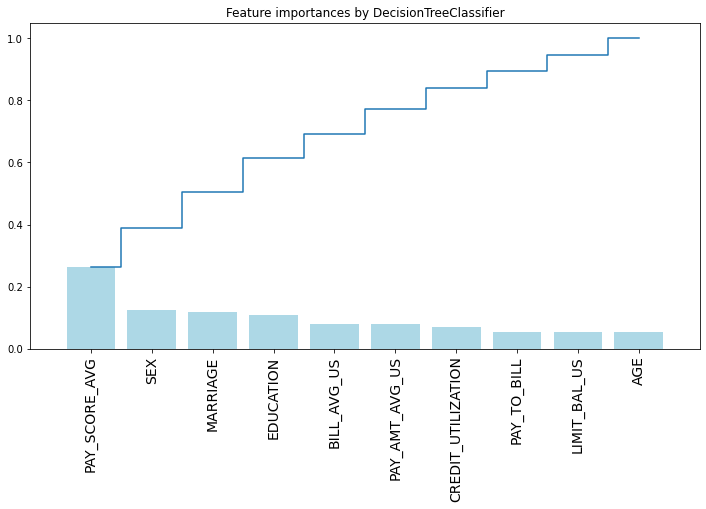

In [23]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.

Recall -tells us generally or overall how well our model predicted based on 
        the total of how much it correctly predicted /correctly predicted +                           how many where actually right but predicted wrong.
                        
                        formula = TP/TP+FN
                        
Precision -tells us or gives us true measure how well our model predicted it                              shows correctly predicted /correctly predicted + how many the model                            predicted to be positive but where false.

                       formula = TP/TP+FP
                       
F1 score - gives us a mean of precision and recall, a sumarization of how well it                        did in respect to recall and precision.


In [24]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [25]:
X_test.shape

(14019, 10)

In [26]:
#Make my predictions
y_prediction = rf.predict(X_test)

In [27]:
y_probability = rf.predict_proba(X_test)

In [28]:
y_probability.shape

(14019, 2)

In [29]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.8162246934702024


In [30]:
y_prediction.reshape(-1,1)

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [31]:
# This shows overall acuracy of how well it will predict defualt or non_default
# The scores corresponding to every class will tell you the accuracy of the classifier 
# in classifying the data points in that particular class compared to all other classes.
# The support is the number of samples of the true response that lie in that class.

print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.83      0.90      0.87      7005
     default       0.89      0.82      0.85      7014

    accuracy                           0.86     14019
   macro avg       0.86      0.86      0.86     14019
weighted avg       0.86      0.86      0.86     14019



In [ ]:
# Creating confusion matrix would give us a ration of non-default compared 
# to default.

In [32]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6333  672]
 [1289 5725]]


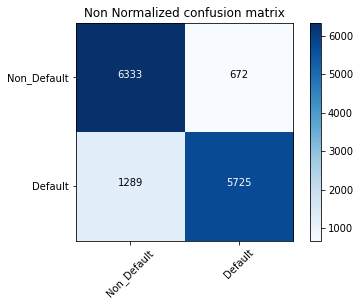

In [34]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')